# Time-Dependent Models (1986–1989)

---

## Description
During the late 1980s, **Jordan Networks (1986)** and **Elman Networks (1989)** introduced the idea of **recurrent feedback connections** in neural networks.  
Unlike feedforward perceptrons, these models could **retain a memory of past inputs**, allowing them to process sequences over time.

- **Jordan Network (1986)**:  
  - Added **context units** that received feedback from the output layer.  
  - These context units stored a copy of the network’s output, feeding it back into the hidden layer at the next time step.  

- **Elman Network (1989)**:  
  - Introduced **context units connected to the hidden layer** (not the output).  
  - This allowed the hidden state itself to be carried forward, giving the network a stronger memory of past activations.  

---

## Relevance
- These were the **first recurrent neural networks (RNNs)**.  
- They established the principle of using **feedback loops to capture temporal dependencies** in data.  
- Inspired the design of later powerful sequence models:
  - **RNNs (1990s)**
  - **GRUs and LSTMs (1997–2014)**  
  - **Transformers (2017–present)**  

---

## Connection
- Like **Hidden Markov Models (HMMs)**, Jordan and Elman Networks modeled **sequential/temporal dependencies**.  
- But instead of probabilistic transitions, they used **continuous hidden states** updated by neural computations.  
- This marked the shift from purely statistical models (Markov/HMMs) to **neural-based sequence models**.

---

## Summary
- **Jordan Network (1986):** Feedback from output → context units → hidden layer.  
- **Elman Network (1989):** Feedback from hidden layer → context units → hidden layer.  
- **Key Contribution:** First neural architectures for sequence learning.  
- **Legacy:** Direct ancestors of modern RNNs, GRUs, LSTMs, and Transformers.


In [1]:
# ===========================================================
# PyTorch Lab: Time-Dependent Models (1986–1989)
# -----------------------------------------------------------
# Jordan Network (1986) & Elman Network (1989)
# Description: Introduced recurrent feedback to model sequences.
# Relevance: Early inspiration for RNNs, GRUs, LSTMs, Transformers.
# Connection: Like HMMs, they capture temporal dependencies.
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Synthetic Sequence Dataset
# -----------------------------
# We'll use a simple sine wave sequence prediction task.
T = 1000
time = np.linspace(0, 40*np.pi, T)
data = np.sin(time)  # sine wave
seq_length = 20

def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+1:i+seq_length+1])
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

X, Y = create_dataset(data, seq_length)
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X,Y), batch_size=32, shuffle=True)

# -----------------------------
# Jordan Network Implementation
# -----------------------------
class JordanNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(JordanNet, self).__init__()
        self.hidden_size = hidden_size
        self.fc_in = nn.Linear(input_size + output_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, x):
        batch_size, seq_len = x.shape
        hidden = torch.zeros(batch_size, self.hidden_size)
        context = torch.zeros(batch_size, 1)  # output feedback
        outputs = []
        for t in range(seq_len):
            inp = torch.cat([x[:,t].unsqueeze(1), context], dim=1)
            hidden = self.tanh(self.fc_in(inp))
            out = self.fc_out(hidden)
            context = out  # feedback from output
            outputs.append(out)
        return torch.cat(outputs, dim=1)

# -----------------------------
# Elman Network Implementation
# -----------------------------
class ElmanNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ElmanNet, self).__init__()
        self.hidden_size = hidden_size
        self.fc_in = nn.Linear(input_size + hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, x):
        batch_size, seq_len = x.shape
        hidden = torch.zeros(batch_size, self.hidden_size)
        outputs = []
        for t in range(seq_len):
            inp = torch.cat([x[:,t].unsqueeze(1), hidden], dim=1)
            hidden = self.tanh(self.fc_in(inp))
            out = self.fc_out(hidden)
            outputs.append(out)
        return torch.cat(outputs, dim=1)

/tmp/ipython-input-2123487776.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)


In [2]:
# -----------------------------
# Training Utility
# -----------------------------
def train_model(model, trainloader, epochs=10, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in trainloader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(trainloader))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}")
    return losses

In [3]:
# -----------------------------
# Train Jordan Network
# -----------------------------
jordan = JordanNet(input_size=1, hidden_size=20, output_size=1)
losses_jordan = train_model(jordan, trainloader, epochs=20, lr=0.01)

Epoch 1/20, Loss: 0.1027
Epoch 2/20, Loss: 0.0097
Epoch 3/20, Loss: 0.0078
Epoch 4/20, Loss: 0.0076
Epoch 5/20, Loss: 0.0073
Epoch 6/20, Loss: 0.0071
Epoch 7/20, Loss: 0.0071
Epoch 8/20, Loss: 0.0069
Epoch 9/20, Loss: 0.0068
Epoch 10/20, Loss: 0.0066
Epoch 11/20, Loss: 0.0065
Epoch 12/20, Loss: 0.0066
Epoch 13/20, Loss: 0.0065
Epoch 14/20, Loss: 0.0065
Epoch 15/20, Loss: 0.0066
Epoch 16/20, Loss: 0.0063
Epoch 17/20, Loss: 0.0064
Epoch 18/20, Loss: 0.0063
Epoch 19/20, Loss: 0.0063
Epoch 20/20, Loss: 0.0063


In [4]:
# -----------------------------
# Train Elman Network
# -----------------------------
elman = ElmanNet(input_size=1, hidden_size=20, output_size=1)
losses_elman = train_model(elman, trainloader, epochs=20, lr=0.01)

Epoch 1/20, Loss: 0.0659
Epoch 2/20, Loss: 0.0081
Epoch 3/20, Loss: 0.0048
Epoch 4/20, Loss: 0.0037
Epoch 5/20, Loss: 0.0031
Epoch 6/20, Loss: 0.0029
Epoch 7/20, Loss: 0.0029
Epoch 8/20, Loss: 0.0029
Epoch 9/20, Loss: 0.0031
Epoch 10/20, Loss: 0.0028
Epoch 11/20, Loss: 0.0027
Epoch 12/20, Loss: 0.0026
Epoch 13/20, Loss: 0.0025
Epoch 14/20, Loss: 0.0023
Epoch 15/20, Loss: 0.0021
Epoch 16/20, Loss: 0.0021
Epoch 17/20, Loss: 0.0021
Epoch 18/20, Loss: 0.0019
Epoch 19/20, Loss: 0.0019
Epoch 20/20, Loss: 0.0018


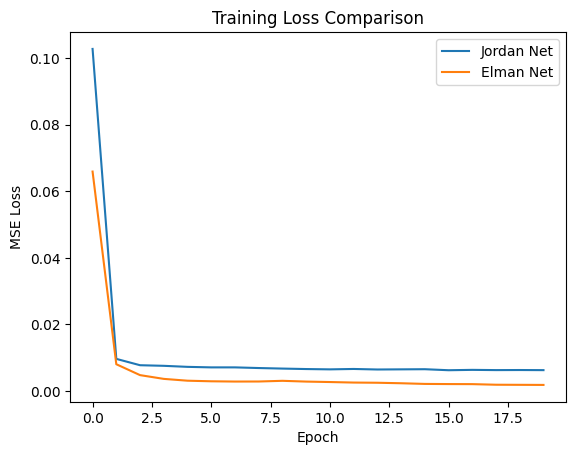

In [5]:
# -----------------------------
# Plot Training Loss
# -----------------------------
plt.plot(losses_jordan, label="Jordan Net")
plt.plot(losses_elman, label="Elman Net")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

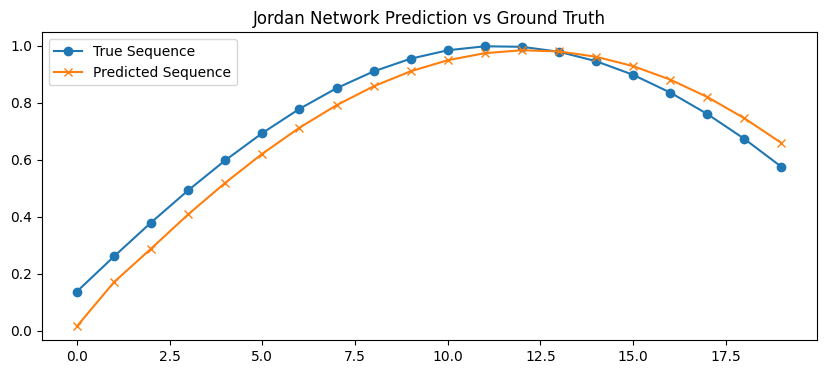

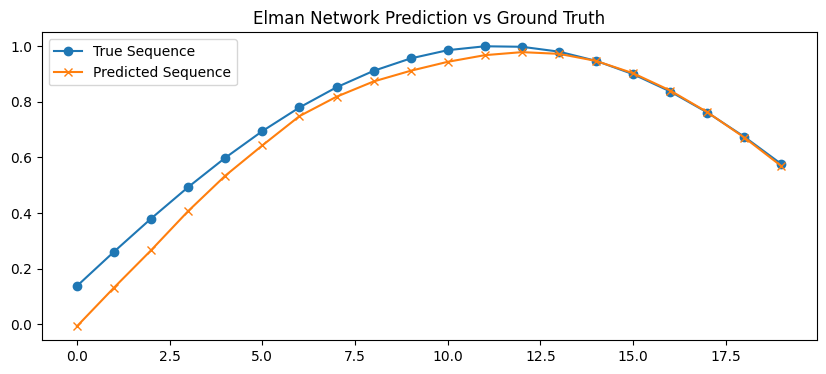

In [6]:
# -----------------------------
# Sequence Prediction Visualization
# -----------------------------
def visualize_predictions(model, name):
    with torch.no_grad():
        start = 100
        input_seq = X[start].unsqueeze(0)
        true_seq = Y[start].squeeze().numpy()
        pred_seq = model(input_seq).squeeze().numpy()
    plt.figure(figsize=(10,4))
    plt.plot(range(seq_length), true_seq, label="True Sequence", marker="o")
    plt.plot(range(seq_length), pred_seq, label="Predicted Sequence", marker="x")
    plt.title(f"{name} Prediction vs Ground Truth")
    plt.legend()
    plt.show()

visualize_predictions(jordan, "Jordan Network")
visualize_predictions(elman, "Elman Network")

In [8]:
# -----------------------------
# Visualize Hidden State Activations
# -----------------------------
def visualize_activations(model, input_seq, name):
    """
    Plots hidden activations over time for Jordan or Elman network.
    input_seq: shape (1, seq_len)
    """
    seq_len = input_seq.shape[1]
    hidden_size = model.hidden_size
    activations = torch.zeros(seq_len, hidden_size)

    # Reset hidden/context depending on type
    hidden = torch.zeros(1, hidden_size)
    context = torch.zeros(1, 1)

    with torch.no_grad():
        for t in range(seq_len):
            if isinstance(model, JordanNet):
                inp = torch.cat([input_seq[:,t].unsqueeze(1), context], dim=1)
                hidden = model.tanh(model.fc_in(inp))
                out = model.fc_out(hidden)
                context = out
            elif isinstance(model, ElmanNet):
                inp = torch.cat([input_seq[:,t].unsqueeze(1), hidden], dim=1)
                hidden = model.tanh(model.fc_in(inp))
                out = model.fc_out(hidden)
            activations[t] = hidden.squeeze()

    # Plot heatmap
    plt.figure(figsize=(10,5))
    plt.imshow(activations.T, aspect="auto", cmap="viridis")
    plt.colorbar(label="Activation")
    plt.xlabel("Time Step")
    plt.ylabel("Hidden Unit Index")
    plt.title(f"{name} Hidden Activations Across Time")
    plt.show()

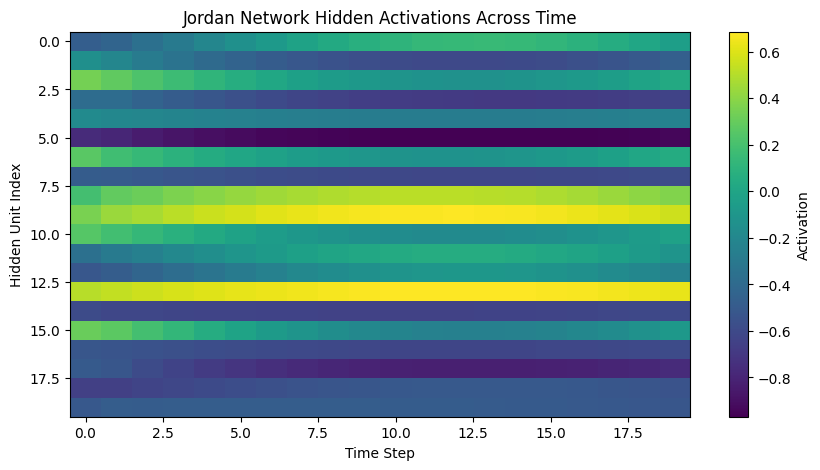

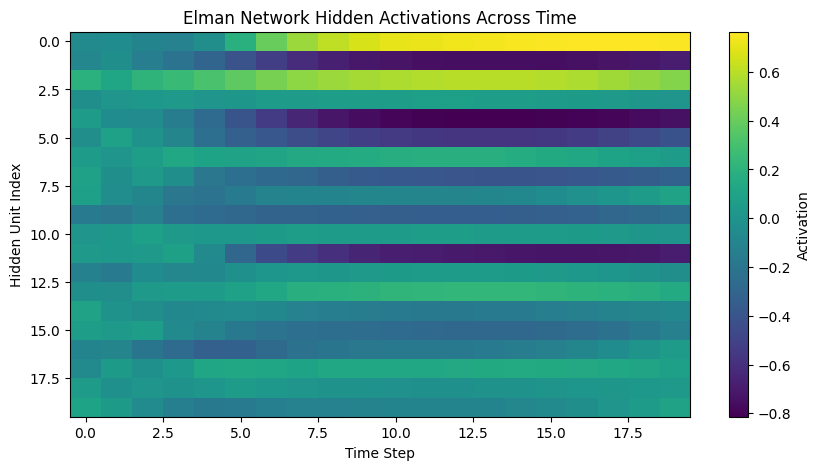

In [9]:
# -----------------------------
# Run Activation Visualization
# -----------------------------
sample_seq = X[200].unsqueeze(0)  # pick a test sequence

visualize_activations(jordan, sample_seq, "Jordan Network")
visualize_activations(elman, sample_seq, "Elman Network")

In [11]:
# ===========================================================
# Generalization Test: Train on Sine, Test on Cosine & Shifted Sine
# ===========================================================

# -----------------------------
# Create Test Datasets
# -----------------------------
# Cosine wave (similar periodic pattern, phase shift)
time_cos = np.linspace(0, 40*np.pi, T)
data_cos = np.cos(time_cos)
X_cos, Y_cos = create_dataset(data_cos, seq_length)

# Phase-shifted sine (sine shifted by pi/2)
time_shift = np.linspace(0, 40*np.pi, T)
data_shift = np.sin(time_shift + np.pi/2)
X_shift, Y_shift = create_dataset(data_shift, seq_length)

# -----------------------------
# Evaluate Generalization
# -----------------------------
def evaluate_generalization(model, X, Y, name, label):
    with torch.no_grad():
        sample = X[100].unsqueeze(0)
        true_seq = Y[100].squeeze().numpy()
        pred_seq = model(sample).squeeze().numpy()

    plt.figure(figsize=(10,4))
    plt.plot(range(seq_length), true_seq, label="True Sequence", marker="o")
    plt.plot(range(seq_length), pred_seq, label="Predicted", marker="x")
    plt.title(f"{name} Generalization on {label}")
    plt.legend()
    plt.show()

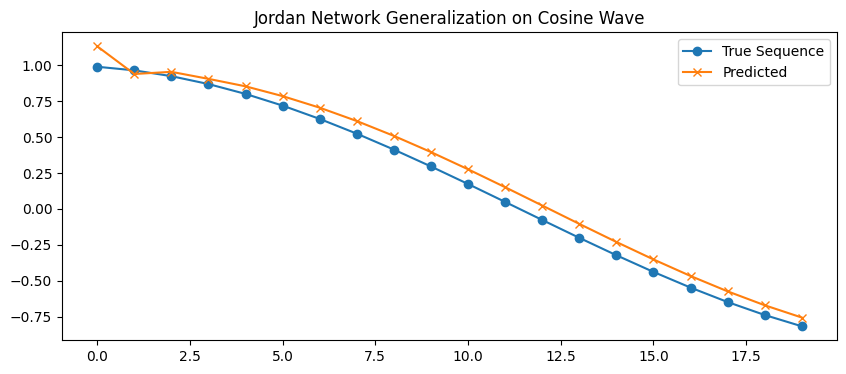

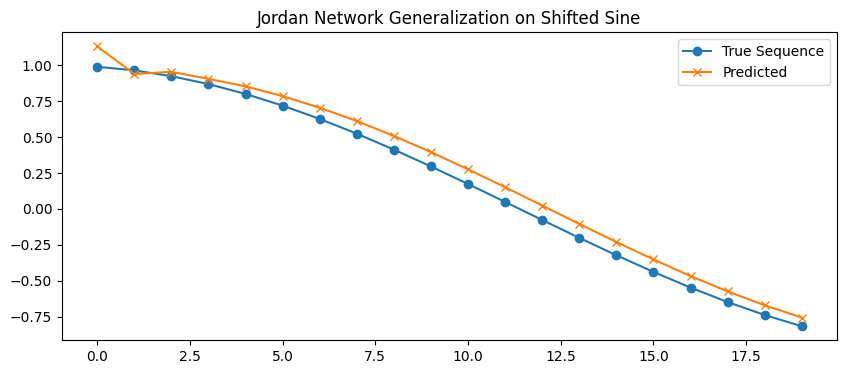

In [12]:
# -----------------------------
# Test Jordan Network
# -----------------------------
evaluate_generalization(jordan, X_cos, Y_cos, "Jordan Network", "Cosine Wave")
evaluate_generalization(jordan, X_shift, Y_shift, "Jordan Network", "Shifted Sine")

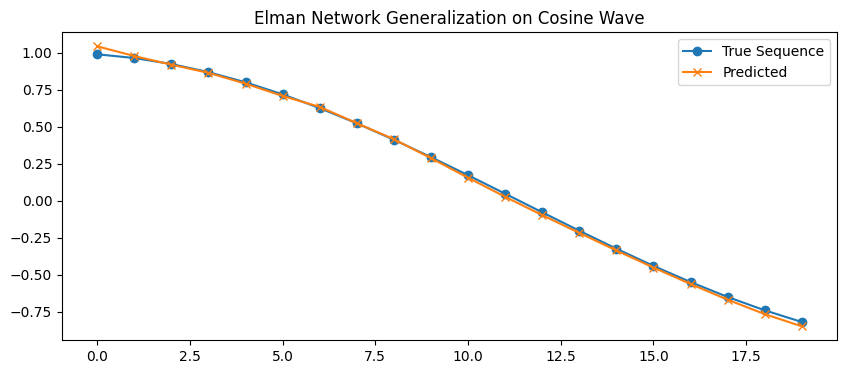

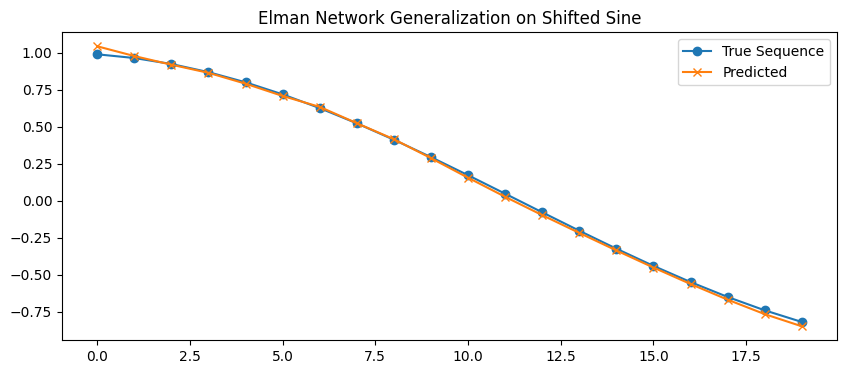

In [13]:
# -----------------------------
# Test Elman Network
# -----------------------------
evaluate_generalization(elman, X_cos, Y_cos, "Elman Network", "Cosine Wave")
evaluate_generalization(elman, X_shift, Y_shift, "Elman Network", "Shifted Sine")

In [15]:
# ===========================================================
# Quantitative Evaluation of Generalization (MSE Scores)
# ===========================================================
from sklearn.metrics import mean_squared_error

def compute_mse(model, X, Y):
    with torch.no_grad():
        sample = X[200:300]  # evaluate on 100 sequences
        preds = model(sample).numpy()
        true = Y[200:300].numpy()
        mse = mean_squared_error(true.flatten(), preds.flatten())
    return mse

In [16]:
# -----------------------------
# Jordan Network Evaluation
# -----------------------------
mse_j_sine   = compute_mse(jordan, X, Y)
mse_j_cos    = compute_mse(jordan, X_cos, Y_cos)
mse_j_shift  = compute_mse(jordan, X_shift, Y_shift)

# -----------------------------
# Elman Network Evaluation
# -----------------------------
mse_e_sine   = compute_mse(elman, X, Y)
mse_e_cos    = compute_mse(elman, X_cos, Y_cos)
mse_e_shift  = compute_mse(elman, X_shift, Y_shift)


=== Generalization Performance (MSE) ===
                   Sine (Train)  Cosine (OOD)  Shifted Sine
Jordan Net (1986)      0.006090      0.006092      0.006092
Elman Net (1989)       0.001806      0.001803      0.001803


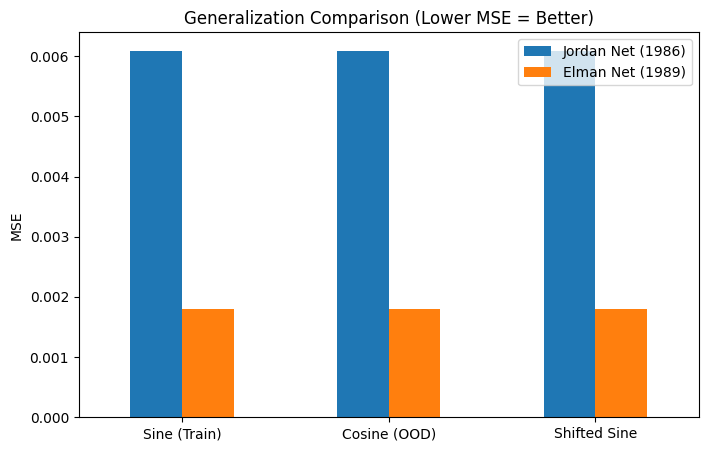

In [17]:
# -----------------------------
# Display Results
# -----------------------------
import pandas as pd

results = pd.DataFrame({
    "Sine (Train)":   [mse_j_sine, mse_e_sine],
    "Cosine (OOD)":   [mse_j_cos, mse_e_cos],
    "Shifted Sine":   [mse_j_shift, mse_e_shift]
}, index=["Jordan Net (1986)", "Elman Net (1989)"])

print("\n=== Generalization Performance (MSE) ===")
print(results)

# Bar Chart
results.T.plot(kind="bar", figsize=(8,5))
plt.title("Generalization Comparison (Lower MSE = Better)")
plt.ylabel("MSE")
plt.xticks(rotation=0)
plt.show()

In [19]:
# ===========================================================
# Add Vanilla PyTorch RNN for Comparison
# ===========================================================

class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity="tanh")
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # add feature dim → (batch, seq_len, 1)
        out, hidden = self.rnn(x)  # out: (batch, seq_len, hidden)
        out = self.fc(out)         # (batch, seq_len, output_size)
        return out.squeeze(-1)     # (batch, seq_len)

# -----------------------------
# Train Vanilla RNN
# -----------------------------
vanilla_rnn = VanillaRNN(input_size=1, hidden_size=20, output_size=1)
losses_rnn = train_model(vanilla_rnn, trainloader, epochs=20, lr=0.01)

Epoch 1/20, Loss: 0.0658
Epoch 2/20, Loss: 0.0084
Epoch 3/20, Loss: 0.0048
Epoch 4/20, Loss: 0.0035
Epoch 5/20, Loss: 0.0034
Epoch 6/20, Loss: 0.0031
Epoch 7/20, Loss: 0.0031
Epoch 8/20, Loss: 0.0031
Epoch 9/20, Loss: 0.0031
Epoch 10/20, Loss: 0.0030
Epoch 11/20, Loss: 0.0029
Epoch 12/20, Loss: 0.0029
Epoch 13/20, Loss: 0.0029
Epoch 14/20, Loss: 0.0030
Epoch 15/20, Loss: 0.0026
Epoch 16/20, Loss: 0.0026
Epoch 17/20, Loss: 0.0025
Epoch 18/20, Loss: 0.0025
Epoch 19/20, Loss: 0.0022
Epoch 20/20, Loss: 0.0021


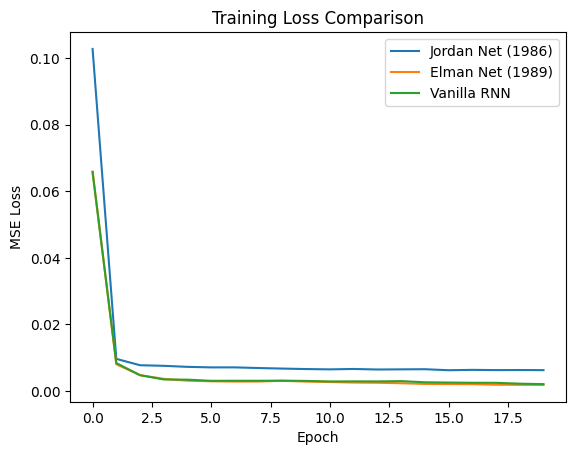

In [22]:
# -----------------------------
# Compare Training Loss
# -----------------------------
plt.plot(losses_jordan, label="Jordan Net (1986)")
plt.plot(losses_elman, label="Elman Net (1989)")
plt.plot(losses_rnn, label="Vanilla RNN")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

In [23]:
# -----------------------------
# Generalization Test Function
# -----------------------------
def compute_mse(model, X, Y):
    with torch.no_grad():
        sample = X[200:300]  # batch of 100 sequences
        preds = model(sample).numpy()
        true = Y[200:300].numpy()
        return mean_squared_error(true.flatten(), preds.flatten())

In [24]:
# -----------------------------
# Collect Results
# -----------------------------
results = pd.DataFrame({
    "Sine (Train)": [
        compute_mse(jordan, X, Y),
        compute_mse(elman, X, Y),
        compute_mse(vanilla_rnn, X, Y)
    ],
    "Cosine (OOD)": [
        compute_mse(jordan, X_cos, Y_cos),
        compute_mse(elman, X_cos, Y_cos),
        compute_mse(vanilla_rnn, X_cos, Y_cos)
    ],
    "Shifted Sine": [
        compute_mse(jordan, X_shift, Y_shift),
        compute_mse(elman, X_shift, Y_shift),
        compute_mse(vanilla_rnn, X_shift, Y_shift)
    ]
}, index=["Jordan Net (1986)", "Elman Net (1989)", "Vanilla RNN"])

print("\n=== Generalization Performance (MSE) ===")
print(results)


=== Generalization Performance (MSE) ===
                   Sine (Train)  Cosine (OOD)  Shifted Sine
Jordan Net (1986)      0.006090      0.006092      0.006092
Elman Net (1989)       0.001806      0.001803      0.001803
Vanilla RNN            0.001948      0.001944      0.001944


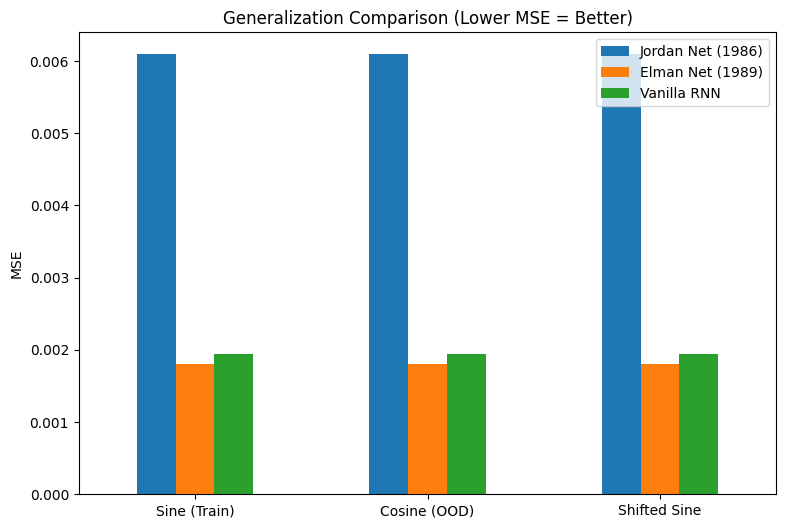

In [25]:
# -----------------------------
# Bar Chart of Results
# -----------------------------
results.T.plot(kind="bar", figsize=(9,6))
plt.title("Generalization Comparison (Lower MSE = Better)")
plt.ylabel("MSE")
plt.xticks(rotation=0)
plt.show()

In [27]:
# ===========================================================
# Add LSTM (Hochreiter & Schmidhuber, 1997)
# ===========================================================

class VanillaLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, (h, c) = self.lstm(x)  # out: (batch, seq_len, hidden_size)
        out = self.fc(out)          # (batch, seq_len, output_size)
        return out.squeeze(-1)      # (batch, seq_len)

# -----------------------------
# Train LSTM
# -----------------------------
lstm = VanillaLSTM(input_size=1, hidden_size=20, output_size=1)
losses_lstm = train_model(lstm, trainloader, epochs=20, lr=0.01)

Epoch 1/20, Loss: 0.1775
Epoch 2/20, Loss: 0.0113
Epoch 3/20, Loss: 0.0055
Epoch 4/20, Loss: 0.0032
Epoch 5/20, Loss: 0.0021
Epoch 6/20, Loss: 0.0014
Epoch 7/20, Loss: 0.0011
Epoch 8/20, Loss: 0.0010
Epoch 9/20, Loss: 0.0009
Epoch 10/20, Loss: 0.0009
Epoch 11/20, Loss: 0.0008
Epoch 12/20, Loss: 0.0008
Epoch 13/20, Loss: 0.0008
Epoch 14/20, Loss: 0.0007
Epoch 15/20, Loss: 0.0007
Epoch 16/20, Loss: 0.0007
Epoch 17/20, Loss: 0.0007
Epoch 18/20, Loss: 0.0007
Epoch 19/20, Loss: 0.0006
Epoch 20/20, Loss: 0.0006


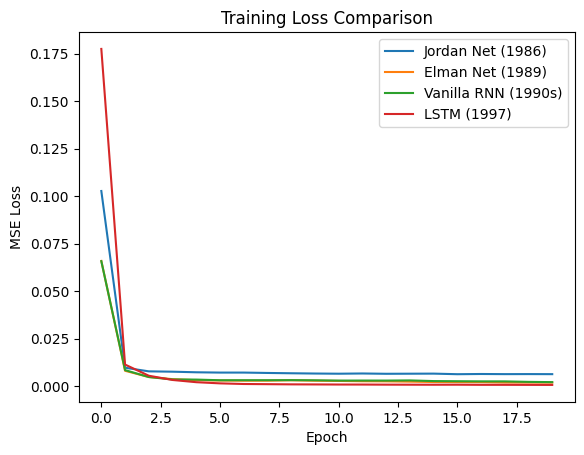

In [28]:
# -----------------------------
# Compare Training Loss Curves
# -----------------------------
plt.plot(losses_jordan, label="Jordan Net (1986)")
plt.plot(losses_elman, label="Elman Net (1989)")
plt.plot(losses_rnn, label="Vanilla RNN (1990s)")
plt.plot(losses_lstm, label="LSTM (1997)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

In [29]:
# -----------------------------
# Quantitative Evaluation (MSE)
# -----------------------------
results = pd.DataFrame({
    "Sine (Train)": [
        compute_mse(jordan, X, Y),
        compute_mse(elman, X, Y),
        compute_mse(vanilla_rnn, X, Y),
        compute_mse(lstm, X, Y)
    ],
    "Cosine (OOD)": [
        compute_mse(jordan, X_cos, Y_cos),
        compute_mse(elman, X_cos, Y_cos),
        compute_mse(vanilla_rnn, X_cos, Y_cos),
        compute_mse(lstm, X_cos, Y_cos)
    ],
    "Shifted Sine": [
        compute_mse(jordan, X_shift, Y_shift),
        compute_mse(elman, X_shift, Y_shift),
        compute_mse(vanilla_rnn, X_shift, Y_shift),
        compute_mse(lstm, X_shift, Y_shift)
    ]
}, index=["Jordan Net (1986)", "Elman Net (1989)", "Vanilla RNN (1990s)", "LSTM (1997)"])

print("\n=== Generalization Performance (MSE) ===")
print(results)


=== Generalization Performance (MSE) ===
                     Sine (Train)  Cosine (OOD)  Shifted Sine
Jordan Net (1986)        0.006090      0.006092      0.006092
Elman Net (1989)         0.001806      0.001803      0.001803
Vanilla RNN (1990s)      0.001948      0.001944      0.001944
LSTM (1997)              0.000597      0.000596      0.000596


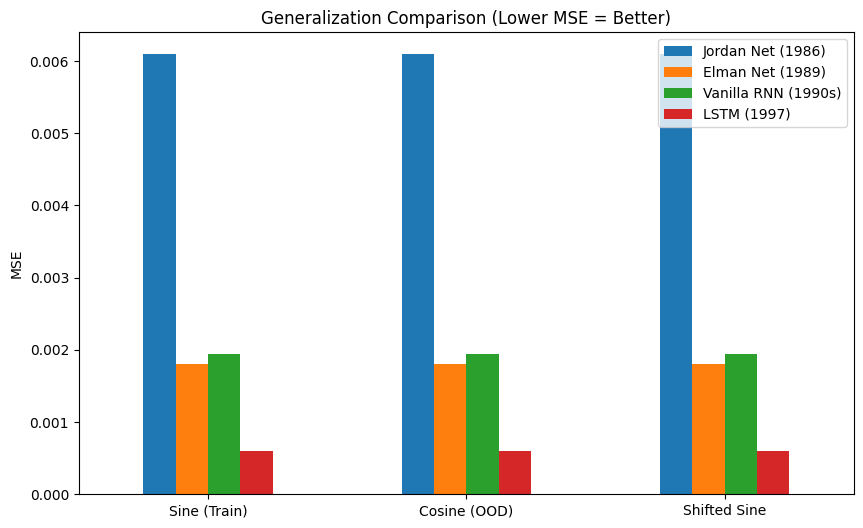

In [31]:
# -----------------------------
# Bar Chart of Results
# -----------------------------
results.T.plot(kind="bar", figsize=(10,6))
plt.title("Generalization Comparison (Lower MSE = Better)")
plt.ylabel("MSE")
plt.xticks(rotation=0)
plt.show()

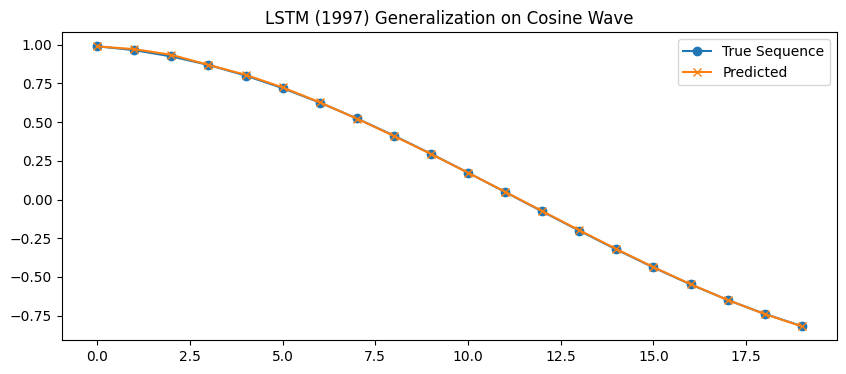

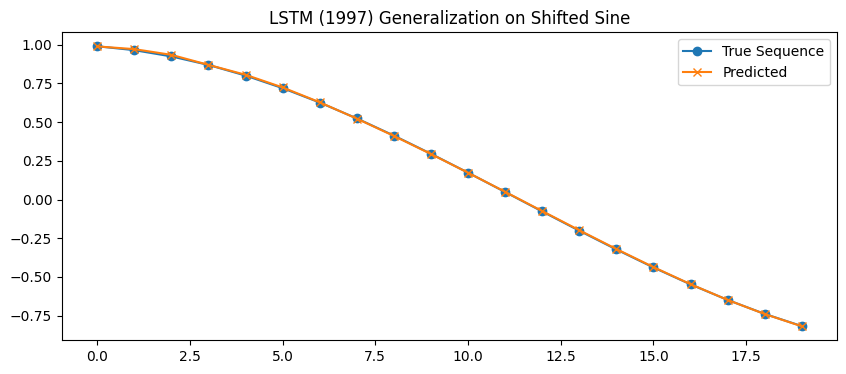

In [32]:
# -----------------------------
# Visualize LSTM Prediction
# -----------------------------
evaluate_generalization(lstm, X_cos, Y_cos, "LSTM (1997)", "Cosine Wave")
evaluate_generalization(lstm, X_shift, Y_shift, "LSTM (1997)", "Shifted Sine")

In [33]:
# ===========================================================
# Add GRU (Cho et al., 2014)
# ===========================================================

class VanillaGRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaGRU, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, h = self.gru(x) # out: (batch, seq_len, hidden_size)
        out = self.fc(out)   # (batch, seq_len, output_size)
        return out.squeeze(-1)

# -----------------------------
# Train GRU
# -----------------------------
gru = VanillaGRU(input_size=1, hidden_size=20, output_size=1)
losses_gru = train_model(gru, trainloader, epochs=20, lr=0.01)

Epoch 1/20, Loss: 0.1032
Epoch 2/20, Loss: 0.0079
Epoch 3/20, Loss: 0.0037
Epoch 4/20, Loss: 0.0025
Epoch 5/20, Loss: 0.0018
Epoch 6/20, Loss: 0.0014
Epoch 7/20, Loss: 0.0012
Epoch 8/20, Loss: 0.0010
Epoch 9/20, Loss: 0.0010
Epoch 10/20, Loss: 0.0009
Epoch 11/20, Loss: 0.0008
Epoch 12/20, Loss: 0.0008
Epoch 13/20, Loss: 0.0007
Epoch 14/20, Loss: 0.0007
Epoch 15/20, Loss: 0.0007
Epoch 16/20, Loss: 0.0006
Epoch 17/20, Loss: 0.0006
Epoch 18/20, Loss: 0.0006
Epoch 19/20, Loss: 0.0006
Epoch 20/20, Loss: 0.0006


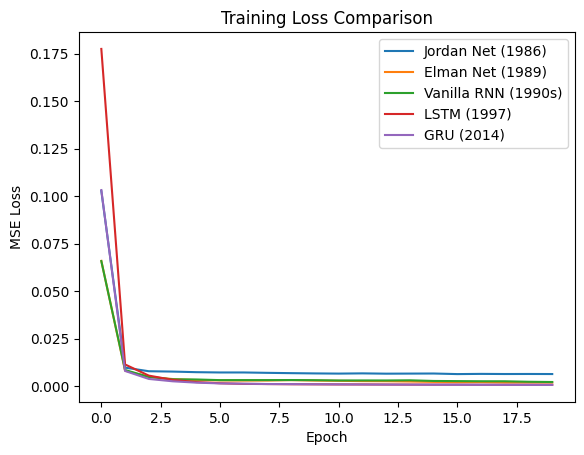

In [34]:
# -----------------------------
# Compare Training Loss Curves
# -----------------------------
plt.plot(losses_jordan, label="Jordan Net (1986)")
plt.plot(losses_elman, label="Elman Net (1989)")
plt.plot(losses_rnn, label="Vanilla RNN (1990s)")
plt.plot(losses_lstm, label="LSTM (1997)")
plt.plot(losses_gru, label="GRU (2014)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

In [35]:
# -----------------------------
# Quantitative Evaluation (MSE)
# -----------------------------
results = pd.DataFrame({
    "Sine (Train)": [
        compute_mse(jordan, X, Y),
        compute_mse(elman, X, Y),
        compute_mse(vanilla_rnn, X, Y),
        compute_mse(lstm, X, Y),
        compute_mse(gru, X, Y)
    ],
    "Cosine (OOD)": [
        compute_mse(jordan, X_cos, Y_cos),
        compute_mse(elman, X_cos, Y_cos),
        compute_mse(vanilla_rnn, X_cos, Y_cos),
        compute_mse(lstm, X_cos, Y_cos),
        compute_mse(gru, X_cos, Y_cos)
    ],
    "Shifted Sine": [
        compute_mse(jordan, X_shift, Y_shift),
        compute_mse(elman, X_shift, Y_shift),
        compute_mse(vanilla_rnn, X_shift, Y_shift),
        compute_mse(lstm, X_shift, Y_shift),
        compute_mse(gru, X_shift, Y_shift)
    ]
}, index=["Jordan Net (1986)",
          "Elman Net (1989)",
          "Vanilla RNN (1990s)",
          "LSTM (1997)",
          "GRU (2014)"])

print("\n=== Generalization Performance (MSE) ===")
print(results)


=== Generalization Performance (MSE) ===
                     Sine (Train)  Cosine (OOD)  Shifted Sine
Jordan Net (1986)        0.006090      0.006092      0.006092
Elman Net (1989)         0.001806      0.001803      0.001803
Vanilla RNN (1990s)      0.001948      0.001944      0.001944
LSTM (1997)              0.000597      0.000596      0.000596
GRU (2014)               0.000537      0.000536      0.000536


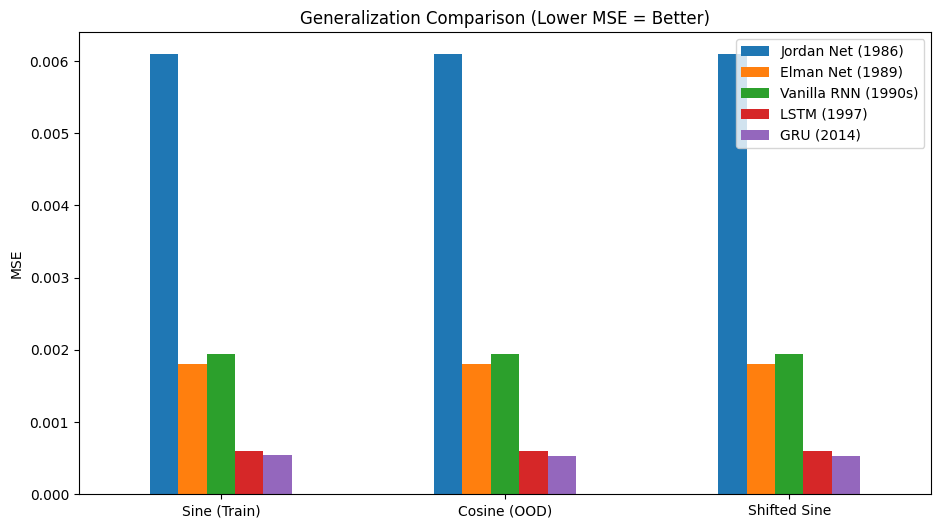

In [36]:
# -----------------------------
# Bar Chart of Results
# -----------------------------
results.T.plot(kind="bar", figsize=(11,6))
plt.title("Generalization Comparison (Lower MSE = Better)")
plt.ylabel("MSE")
plt.xticks(rotation=0)
plt.show()

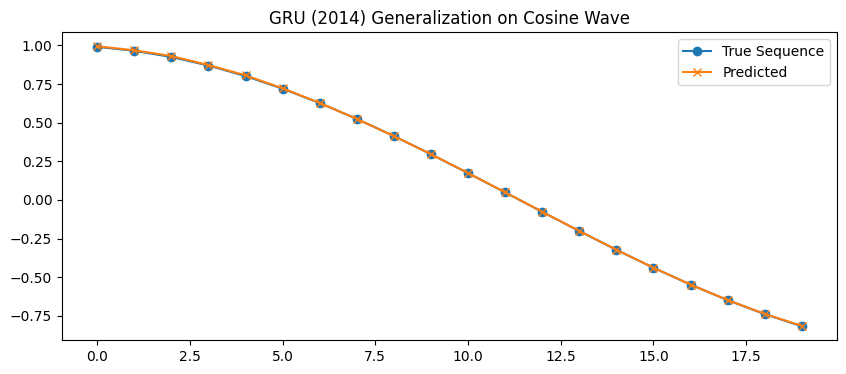

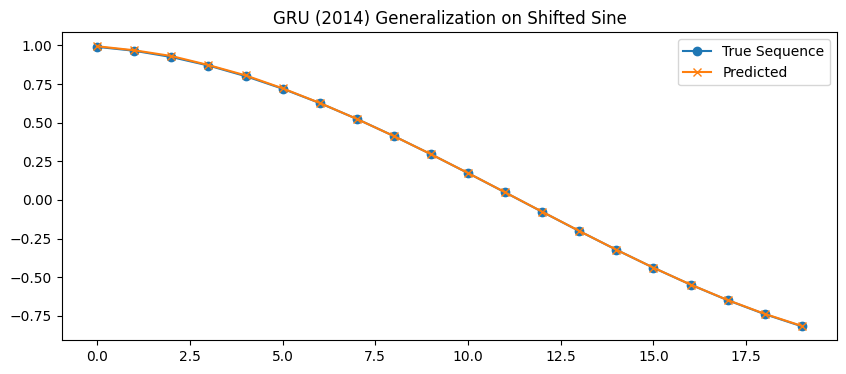

In [37]:
# -----------------------------
# Visualize GRU Prediction
# -----------------------------
evaluate_generalization(gru, X_cos, Y_cos, "GRU (2014)", "Cosine Wave")
evaluate_generalization(gru, X_shift, Y_shift, "GRU (2014)", "Shifted Sine")